In [1]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from argparse import Namespace
# from model import MLP

from torch import nn
from dataloader import load_data
from tqdm import tqdm




device='cuda:1'
train_inputs,train_lables,test_inputs,test_lables=load_data(300000,300000,device=torch.device(device))




load data set
create loader
construct data


100%|██████████| 1/1 [00:05<00:00,  5.35s/it]


In [2]:
import model3 
# from model4 import MLP
import importlib
importlib.reload(model3)
MLP=model3.MLP 
mlp = MLP()
mlp.train()

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=1024, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): LeakyReLU(negative_slope=0.1)
    (8): Linear(in_features=32, out_features=10, bias=True)
  )
)

epoch0 loss:0.5005331635475159
epoch0 acc:0.866525
epoch1 loss:0.5004997849464417
epoch1 acc:0.866525
epoch2 loss:0.5004667043685913
epoch2 acc:0.866525
epoch3 loss:0.5004335045814514
epoch3 acc:0.866525
epoch4 loss:0.5004005432128906
epoch4 acc:0.86655
epoch5 loss:0.5003673434257507
epoch5 acc:0.866575
epoch6 loss:0.5003344416618347
epoch6 acc:0.866575
epoch7 loss:0.5003011226654053
epoch7 acc:0.8666
epoch8 loss:0.5002679824829102
epoch8 acc:0.8666
epoch9 loss:0.5002351999282837
epoch9 acc:0.8666
epoch10 loss:0.5002018809318542
epoch10 acc:0.866625
epoch11 loss:0.5001687407493591
epoch11 acc:0.86665
epoch12 loss:0.5001357793807983
epoch12 acc:0.86665
epoch13 loss:0.500102698802948
epoch13 acc:0.86665
epoch14 loss:0.5000697374343872
epoch14 acc:0.86665
epoch15 loss:0.500036895275116
epoch15 acc:0.86665
epoch16 loss:0.500003457069397
epoch16 acc:0.866675
epoch17 loss:0.4999704658985138
epoch17 acc:0.866725
epoch18 loss:0.4999372959136963
epoch18 acc:0.866725
epoch19 loss:0.4999043345451

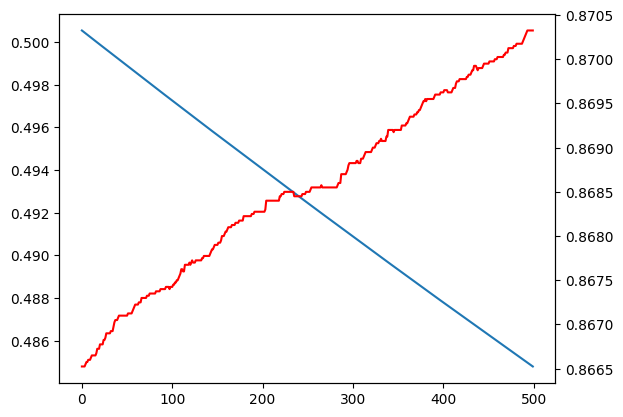

In [4]:
from matplotlib import pyplot as plt
param=Namespace(
    lr            = 1e-4,
    epoch         = 500,  
)

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total



mlp.to(device,non_blocking=True)
optimizer = torch.optim.SGD(mlp.parameters(), lr=param.lr)
loss_function = nn.CrossEntropyLoss()

loss_list=[]
acc_list=[]

for epoch in range(param.epoch):
    ls=0
    for i in range(len(train_inputs)): 
        inputi  = train_inputs[i]
        label  = train_lables[i]
        output = mlp(inputi)
        loss   = loss_function(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls+=loss
        
    print(f"epoch{epoch} loss:{loss}")
    
    acci=acc(mlp)
    print(f"epoch{epoch} acc:{acci}")
    acc_list.append(acci)
    loss_list.append(ls)


y1=plt.subplot()
loss_list=[i.cpu().detach().numpy() for i in loss_list]

y1.plot(range(param.epoch),loss_list,label='loss')

y2=y1.twinx()
y2.plot(range(param.epoch),acc_list,label='acc',color='r')

plt.show()


In [5]:
spmodel=torch.jit.script(mlp)
spmodel.save('mlp.pth')